In [1]:
# An example of 2-strain system with multi-trait variation.
# we illustrate a dynamics example for a 2-strain system tending to exclusion.  
import numpy as np
from scipy import integrate
import scipy.integrate  as  ode
import matplotlib.pyplot  as  plt
np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

In [4]:
def repli(R0): #solve the solution for replicator
    #parameters
    m = beta/R0
    #compute clearance rate gamma
    gamm = m - 0.2 #mortality as well as recruitment rate r = 0.2
    
    #computation
    # Parameters of neutral system
    S_star = m/beta
    T_star = 1 - S_star
    I_star = m*T_star/(m + beta*k*T_star)
    J_star = T_star - I_star
    detP = -I_star*J_star + 2*(T_star)**2
    mu = 1/(k*(R0 - 1))
    # weight of trait perturbation \theta_i
    teth1 = 2*beta*S_star*(T_star)**2/detP
    teth2 = gamm*I_star*(I_star + T_star)/detP
    teth3 = gamm*T_star*J_star/detP
    teth4 = 2*m*T_star*J_star/detP
    teth5 = beta*T_star*I_star*J_star/detP
    
    lamd = np.zeros((n,n)) #n: number of similar strains
    for i in range (0, n):
        for j in range (0, n): #compute pairwise invasion fitnesses matrix
            lamd[i][j] = teth1*(b[i] - b[j]) + teth2*(- nu1d[i] + nu1d[j]) + teth3*(- nu2d[i][j] - nu2d[j][i] + 2*nu2d[j][j]) + teth4*(omega[i][j] - omega[j][i]) + teth5*(mu*(alp[j][i] - alp[i][j]) + alp[j][i] - alp[j][j])
        #replicator system
    def du_dt(u, t = 0):
        return u*(np.dot(lamd,u) - np.dot(np.dot(lamd,u),u))
    # solve the replicator system
    u, infodict = integrate.odeint(du_dt, u0, t, full_output = True)
    infodict['message']
    s = []
    for i in range(0, n):
        s.append(u.T[i])
    return s

def root(x,y): # cut the value of pairwise invasion fitnesses vs 2%
    mini = []
    for i in range (0, len(x)):
        mini.append(np.minimum(x[i],y[i]))
        
    for i in range (0,len(x)):
        if mini[i] < 0.02:
            break
            
    cut = t[i]
    return cut

In [5]:
# parameters
n = 2 #two-strain system
b = np.array([1, -1.5]) # variation in infection transmission rates \beta_{i}
nu1d = np.array([-2, -3]) # variation in infection clearance rates \gamma_{i}
nu2d = np.array([[1, -2], [-2, 3]]) # variation in coinfection clearance rates \gamma_{ij}
alp = np.array([[-np.sqrt(2), 0 ], [np.sqrt(2), 0]]) #variation in co-colonization interaction coefficients k_{ij}
omega = np.array([[-1,-3],[-1,3]]) # variation in transmission probability from coinfected hosts p^i{ij}

beta = 4 #transmission rate beta
k = 1.5 #co-colonization interaction factor
u0 = np.array([0.3, 0.7])
t = np.linspace(0, 6, 100)

label = np.array(['a', 'b'])
R0_matrix = np.array([1.5, 1.1]) #two cases: R0 = 1.5 and 1.1

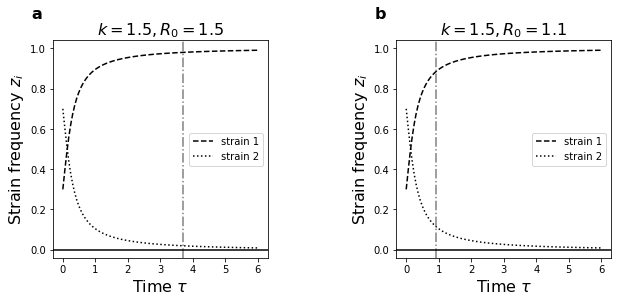

In [13]:
strain_1 = []
strain_2 = []
cut = []

for i in range (0, len(R0_matrix)):
    s = repli(R0_matrix[i])
    strain_1.append(s[0])
    strain_2.append(s[1])
    intersection = root(s[0],s[1])
    strain_1.append(s[0])
    strain_2.append(s[1])
    cut.append(intersection)


fig, ax = plt.subplots(1, 2, figsize = (10,4))
fig.subplots_adjust(wspace = 0.6)

for i in range(0, n):
    ax[i].plot(t, strain_1[i], 'k--', label = 'strain 1')
    ax[i].plot(t, strain_2[i], 'k:', label = 'strain 2')
    
    ax[i].axvline(x = cut[i], color = 'grey', linestyle = 'dashdot')
    ax[i].set_xlabel('Time $\\tau$', fontsize = 16)
    ax[i].set_ylabel('Strain frequency $z_i$', fontsize = 16)
    ax[i].legend(loc='best')
    ax[i].axhline(color='k')
    ax[i].set_title('$k = 1.5, R_0 = {}$'.format(R0_matrix[i]), fontsize = 16)
    ax[i].text(-0.1, 1.1, '{}'.format(label[i]), transform=ax[i].transAxes, size=16, weight='bold')